# Student Information
Name: 黃宇加

Student ID: 110034011

GitHub ID: REX722

---

# 1. Take Home Exercise

### Setup

In [182]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

In [183]:
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [184]:
# 篩選出1和3的category
X[X['category'].isin([1,3])]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics


---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [185]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [186]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [187]:
# Answer here
'''
根據isnull()的document解釋：
isnull()只有在np.nan和None這兩個值的時候會map到True
其它像是F的這種''的空字串或np.inf都會是False，而C和D的例子都是字串，所以會回傳False
'''

"\n根據isnull()的document解釋：\nisnull()只有在np.nan和None這兩個值的時候會map到True\n其它像是F的這種''的空字串或np.inf都會是False，而C和D的例子都是字串，所以會回傳False\n"

---

### Setup

In [188]:
X_sample = X.sample(n=1000, random_state = 42) #random state

### **>>> Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [189]:
X['category'].value_counts(normalize=True) * 100

3    26.539654
2    26.318121
1    25.875055
0    21.267169
Name: category, dtype: float64

In [190]:
X_sample['category'].value_counts(normalize=True) * 100

2    27.7
3    27.0
1    24.7
0    20.6
Name: category, dtype: float64

In [191]:
# Answer here
''' 
1. rows從2257變成1000
2. X_sample的index是亂的，沒有照順序
3. category(category_name)每種的比例改變，在X中3類比2類多，而X_sample的3類比2類少
''' 

' \n1. rows從2257變成1000\n2. X_sample的index是亂的，沒有照順序\n3. category(category_name)每種的比例改變，在X中3類比2類多，而X_sample的3類比2類少\n'

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'X':X.category_name.value_counts(), 
                   'X_sample': X_sample.category_name.value_counts()})
df.sort_values(by = 'X', ascending = False, inplace = True)
df

,X,X_sample
soc.religion.christian,599,270
sci.med,594,277
comp.graphics,584,247
alt.atheism,480,206


<Axes: title={'center': 'Category distribution'}>

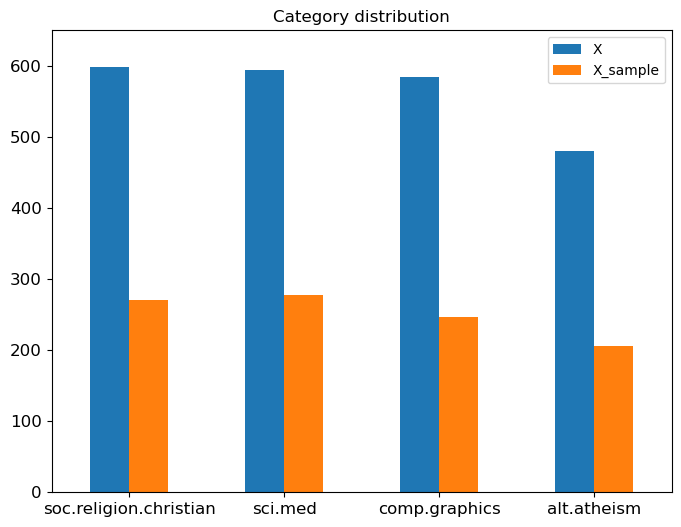

In [193]:
df.plot(kind='bar',
       title='Category distribution',
       ylim=(0,650),
       rot = 0, 
       fontsize = 12, 
       figsize = (8,6))

---

### Setup

In [194]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [195]:
# Answer here
'''
This shows the two terms show in the fourth document
'''
count_vect.get_feature_names_out()[np.where(X_counts[0:5, 0:100].toarray()[4] == 1)]

array(['00', '01'], dtype=object)

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

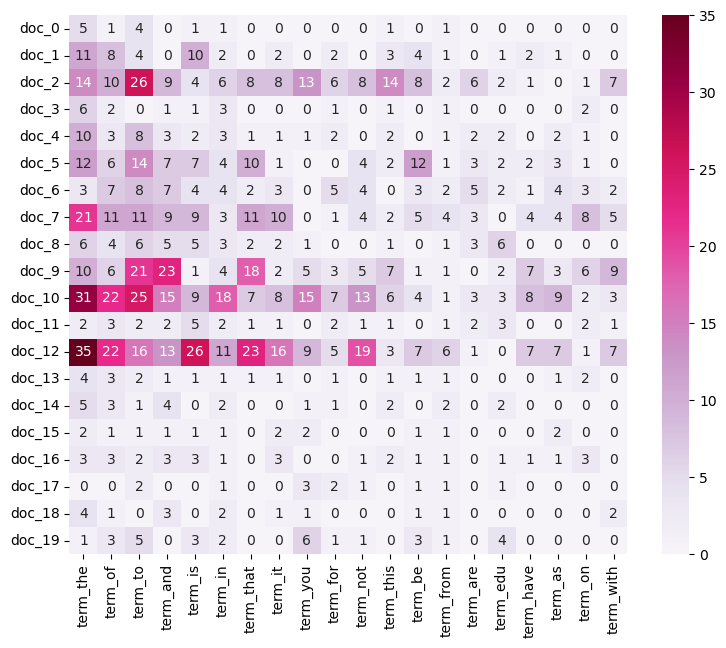

In [196]:
# Answer here
import seaborn as sns
top_20_frequence_terms_index = np.argsort(-np.asarray(X_counts.sum(axis=0))[0])[0:20] # 先找出前20多出現次數的index
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_20_frequence_terms_index]] # 利用前面找出的index找出那些字
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]] # 看前面20個document
plot_z = X_counts[0:20, top_20_frequence_terms_index].toarray() # 找出前20個document出現整個文件前20多出現次數的字的次數

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                annot=True)

---

### Setup

In [197]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [198]:
# Answer here
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()

---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [199]:
# 創建一個dataframe並篩選出現次數>3的term
df = pd.DataFrame(data={
    'terms': count_vect.get_feature_names_out()[:300],
    'frequencies': term_frequencies[:300]
})
df= df[df['frequencies'] > 3]

In [200]:
fig = px.bar(df, x = 'terms', y = 'frequencies')
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()

---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [201]:
# 利用 Exercise13 的dataframe排序
df.sort_values(by = 'frequencies', ascending = False, inplace = True)

In [202]:
fig = px.bar(df, x = 'terms', y = 'frequencies')
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()

---

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [203]:
# 因為plotly可以直接用 loy_y 將y值轉成log，所以延續使用Exercise13的dataframe
fig = px.bar(df, x = 'terms', y = 'frequencies', log_y = True)
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()
'''
1. 利用出現的次數來排序可以比較容易看出高低關係，不像前一個圖中比較難比較數量的多寡
2. 將次數取log後，可以比較容易看出後段微小的差異，在Exercise 14中幾乎難以找出後段不同數量的斷點
3. 另外，原本第一個字與後面的字出現次數差距很大，取完log後，有變得比較平滑一些
'''

'\n1. 利用出現的次數來排序可以比較容易看出高低關係，不像前一個圖中比較難比較數量的多寡\n2. 將次數取log後，可以比較容易看出後段微小的差異，在Exercise 14中幾乎難以找出後段不同數量的斷點\n3. 另外，原本第一個字與後面的字出現次數差距很大，取完log後，有變得比較平滑一些\n'

---

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [204]:
# Answer here
'''
1. 在每一個category中，出現次數前5多的大概都是the of to is and that，所以這些字可能對於後續分類category沒有幫助
2. 在 sci.med的後1%中，出現蠻多類似症狀或是藥物或化學相關的醫學專有名詞，後續利用這些字在分類時可能會分得還不錯
3. 在 comp.graphics前5%中，有出現computer, animation, model, performance等相關用字，與其它三種的主題差蠻多的
4. 在 alt.atheism的後1%中，出現蠻多反面或負面的字眼
5. 在 soc.religion.christian的後1%中，有出現一些比較特殊的宗教字眼，像是extrascriptural, ezekiel, ressurrections等等
6. 總而言之，在前面5%的字中，比較多常見的字，對於分類來說可能沒什麼幫助，所以可以利用後1%的字，比較會有一些與主題相關且特殊的字
'''


'\n1. 在每一個category中，出現次數前5多的大概都是the of to is and that，所以這些字可能對於後續分類category沒有幫助\n2. 在 sci.med的後1%中，出現蠻多類似症狀或是藥物或化學相關的醫學專有名詞，後續利用這些字在分類時可能會分得還不錯\n3. 在 comp.graphics前5%中，有出現computer, animation, model, performance等相關用字，與其它三種的主題差蠻多的\n4. 在 alt.atheism的後1%中，出現蠻多反面或負面的字眼\n5. 在 soc.religion.christian的後1%中，有出現一些比較特殊的宗教字眼，像是extrascriptural, ezekiel, ressurrections等等\n6. 總而言之，在前面5%的字中，比較多常見的字，對於分類來說可能沒什麼幫助，所以可以利用後1%的字，比較會有一些與主題相關且特殊的字\n'

---

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [205]:
result = pd.DataFrame(columns=['Algorithm', 'minSup/kCount', 'Total No of patterns', 'Runtime'])

#### FPGrowth

In [206]:
from PAMI.frequentPattern.basic import FPGrowth
minSup = 9

obj = FPGrowth.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup = minSup)
obj.mine()

result.loc[result.shape[0]] = ['FPGrowth', minSup, len(obj.getPatterns()), obj.getRuntime()]

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


#### FAE Top-K

In [207]:
from PAMI.frequentPattern.topk import FAE

kCountList = [500, 1000, 1500]
for kCount in kCountList:
    obj2 = FAE.FAE(iFile = 'td_freq_db_comp_graphics.csv', k = kCount, sep = '\t')
    obj2.mine()

    result.loc[result.shape[0]] = ['FAE Top-K', kCount, len(obj2.getPatterns()), obj2.getRuntime()]

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.


#### MaxFPGrowth

In [208]:
from PAMI.frequentPattern.maximal import MaxFPGrowth

minimumSupportCountList = [3, 6, 9]

for minSupCount in minimumSupportCountList:
    obj3 = MaxFPGrowth.MaxFPGrowth('td_freq_db_comp_graphics.csv', minSup = minSupCount, sep='\t')
    obj3.mine()

    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj3.getPatterns()), obj3.getRuntime()]

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 


In [209]:
result

,Algorithm,minSup/kCount,Total No of patterns,Runtime
0,FPGrowth,9,33574,0.127456
1,FAE Top-K,500,500,0.802747
2,FAE Top-K,1000,1000,2.368624
3,FAE Top-K,1500,1500,3.884299
4,MaxFPGrowth,3,6872,18.094262
5,MaxFPGrowth,6,1340,0.277422
6,MaxFPGrowth,9,660,0.118516


In [210]:
'''
1. 從FPGrowth和MaxFPGrowth的結果來看，在同樣將minSup設成9時，FPGrowth出現的pattern數量比MaxFPGrowth來得多，且執行時間較短
2. FAE Top-K 設定的kCount越多，執行時間就越長
3. 在設定不同minSup的MaxFPGrowth中，當minSup越高，pattern的數量就越少，且執行時間越短
'''

'\n1. 從FPGrowth和MaxFPGrowth的結果來看，在同樣將minSup設成9時，FPGrowth出現的pattern數量比MaxFPGrowth來得多，且執行時間較短\n2. FAE Top-K 設定的kCount越多，執行時間就越長\n3. 在設定不同minSup的MaxFPGrowth中，當minSup越高，pattern的數量就越少，且執行時間越短\n'

---

### Setup

In [211]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9

In [212]:
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [213]:
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]

pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

total_patterns_count = sum(len(df) for df in dfs)

discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [214]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out() 

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

In [215]:
# 在產生pattern_matrix的DataFrame有做一些修改，讓速度變快
pattern_matrix = pd.DataFrame(
    {
        pattern: X['tokenized_text'].apply(lambda x: int(pattern_words.issubset(x)))
        for pattern in final_pattern_df['Patterns']
        for pattern_words in [set(pattern.split())]
    }
)

In [216]:
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [225]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
X_pca_aug = PCA(n_components = 3, random_state = 42).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components = 3, random_state = 42).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components = 3, random_state = 42).fit_transform(augmented_df.values)

c:\Users\Rex\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [226]:
from mpl_toolkits.mplot3d import Axes3D 

col = ['red', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

def plot_3d_scatter(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    
    ax.view_init(elev=elev, azim=azim)

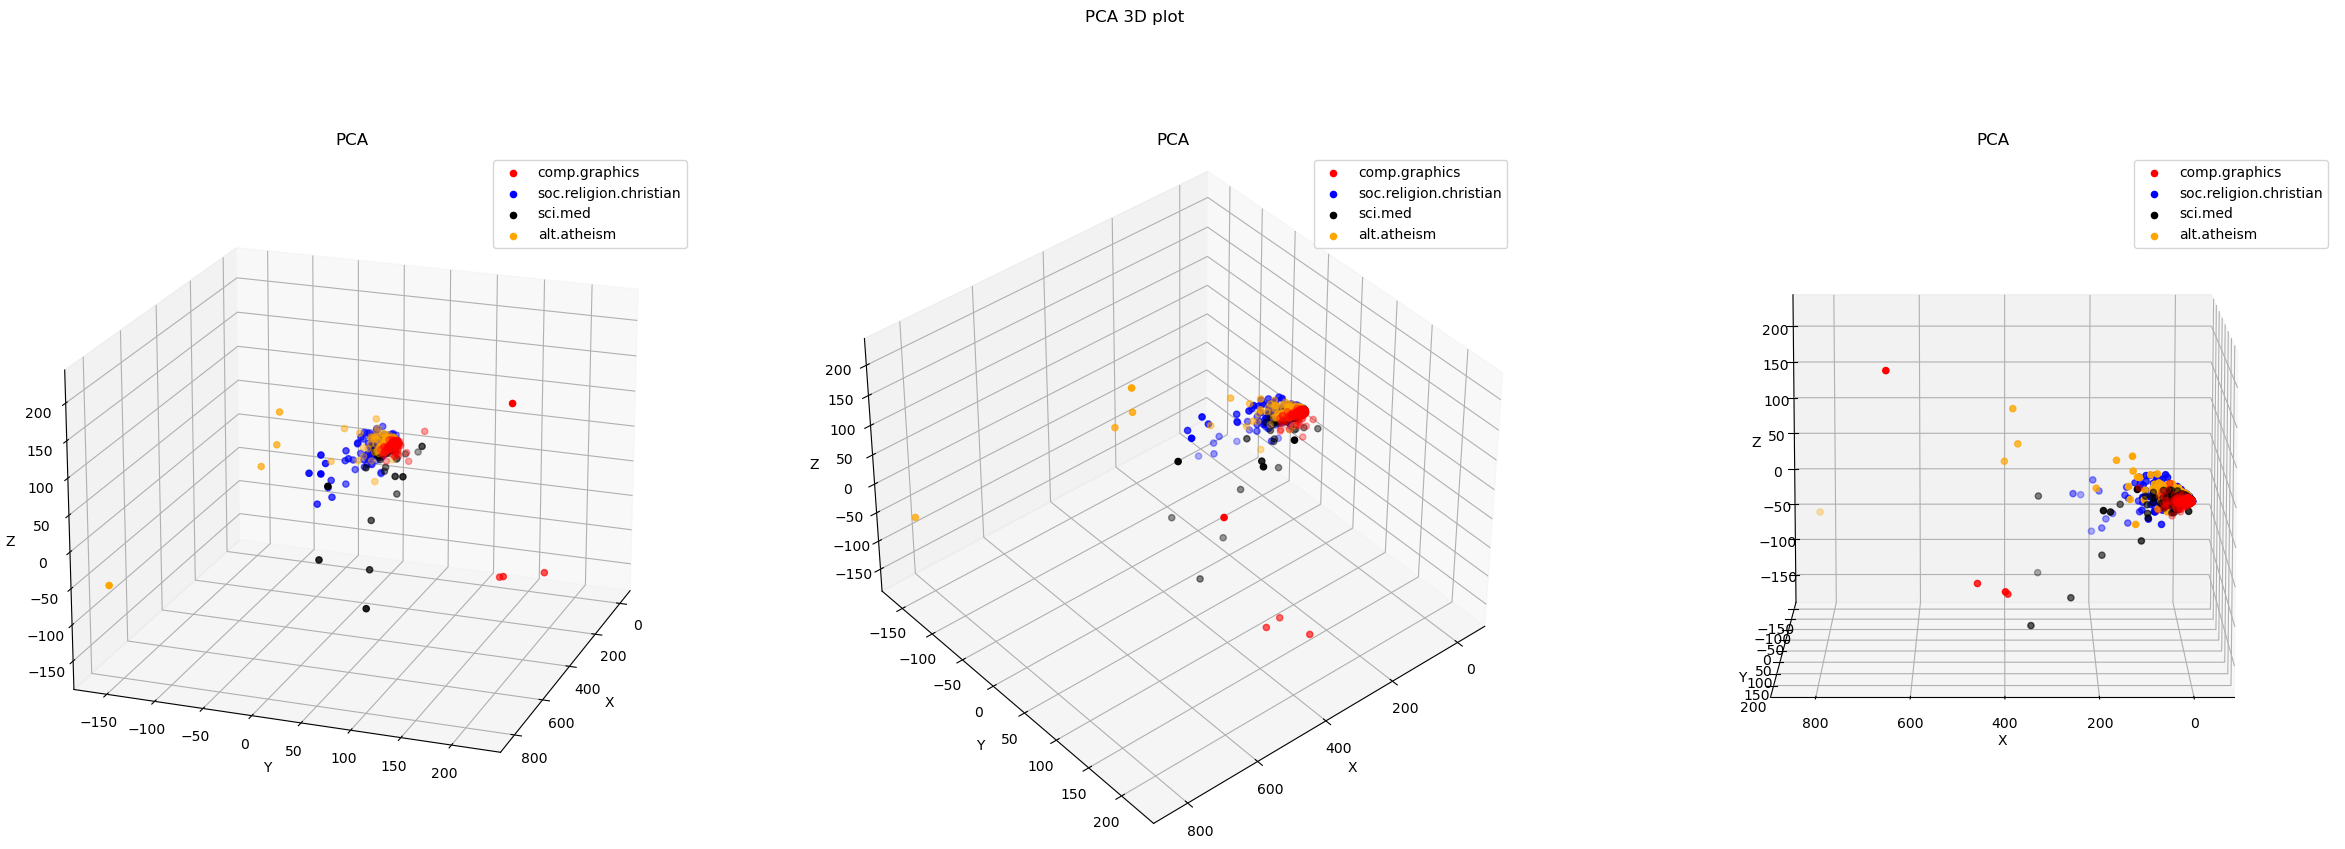

In [227]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('PCA 3D plot')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA', elev=20, azim=20)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_pca_aug, 'PCA', elev=40, azim=50)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_pca_aug, 'PCA', elev=10, azim=90)

plt.show()

In [220]:
'''
1. 在PCA的圖中，並沒有看到明顯的分割點，且資料大部分都集中在同一個地方，僅有一些outlier
2. soc.religion.christian的種類的點相較其它三種較為集中，沒有明顯的outlier
'''

'\n1. 在PCA的圖中，並沒有看到明顯的分割點，且資料大部分都集中在同一個地方，僅有一些outlier\n2. soc.religion.christian的種類的點相較其它三種較為集中，沒有明顯的outlier\n'

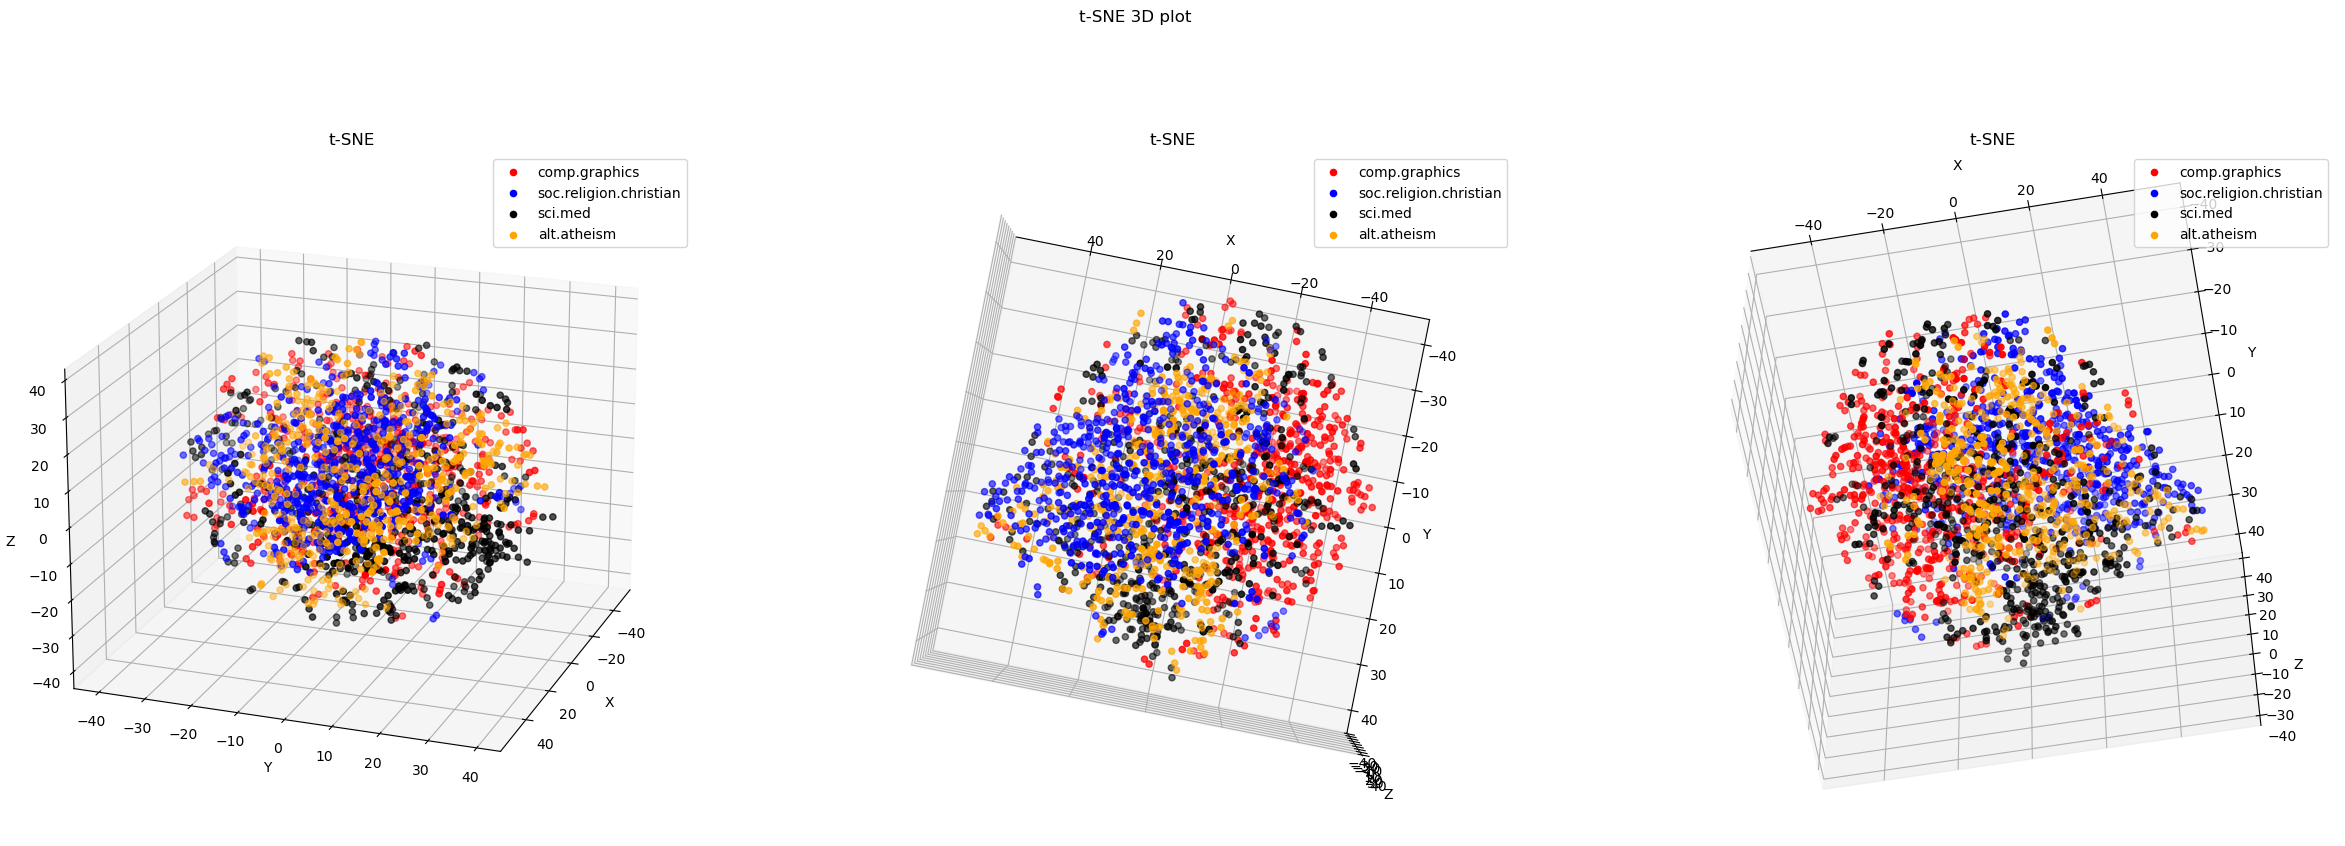

In [251]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('t-SNE 3D plot')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_tsne_aug, 't-SNE', elev=20, azim=20)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE', elev=90, azim=100)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_tsne_aug, 't-SNE', elev=-60, azim=280)

plt.show()

In [222]:
'''
1. 在t-SNE的圖與PCA一樣沒有明顯的分割點，但分布不像PCA來的集中，點密度較低
2. 在中間的角度可以稍微看出來soc.religion.christian(藍色)和comp.graphics(紅色)的界線
3. 在右邊的角度也可以稍微看出comp.graphics(紅色)和alt.atheism(橘色)的界線
'''

'\n1. 在t-SNE的圖與PCA一樣沒有明顯的分割點，但分布不像PCA來的集中，點密度較低\n2. 在中間的角度可以稍微看出來comp.graphics(珊瑚紅)和alt.atheism(橘色)的界線\n3. 在右邊的角度也可以稍微看出soc.religion.christian(藍色)和comp.graphics(珊瑚紅)的界線\n'

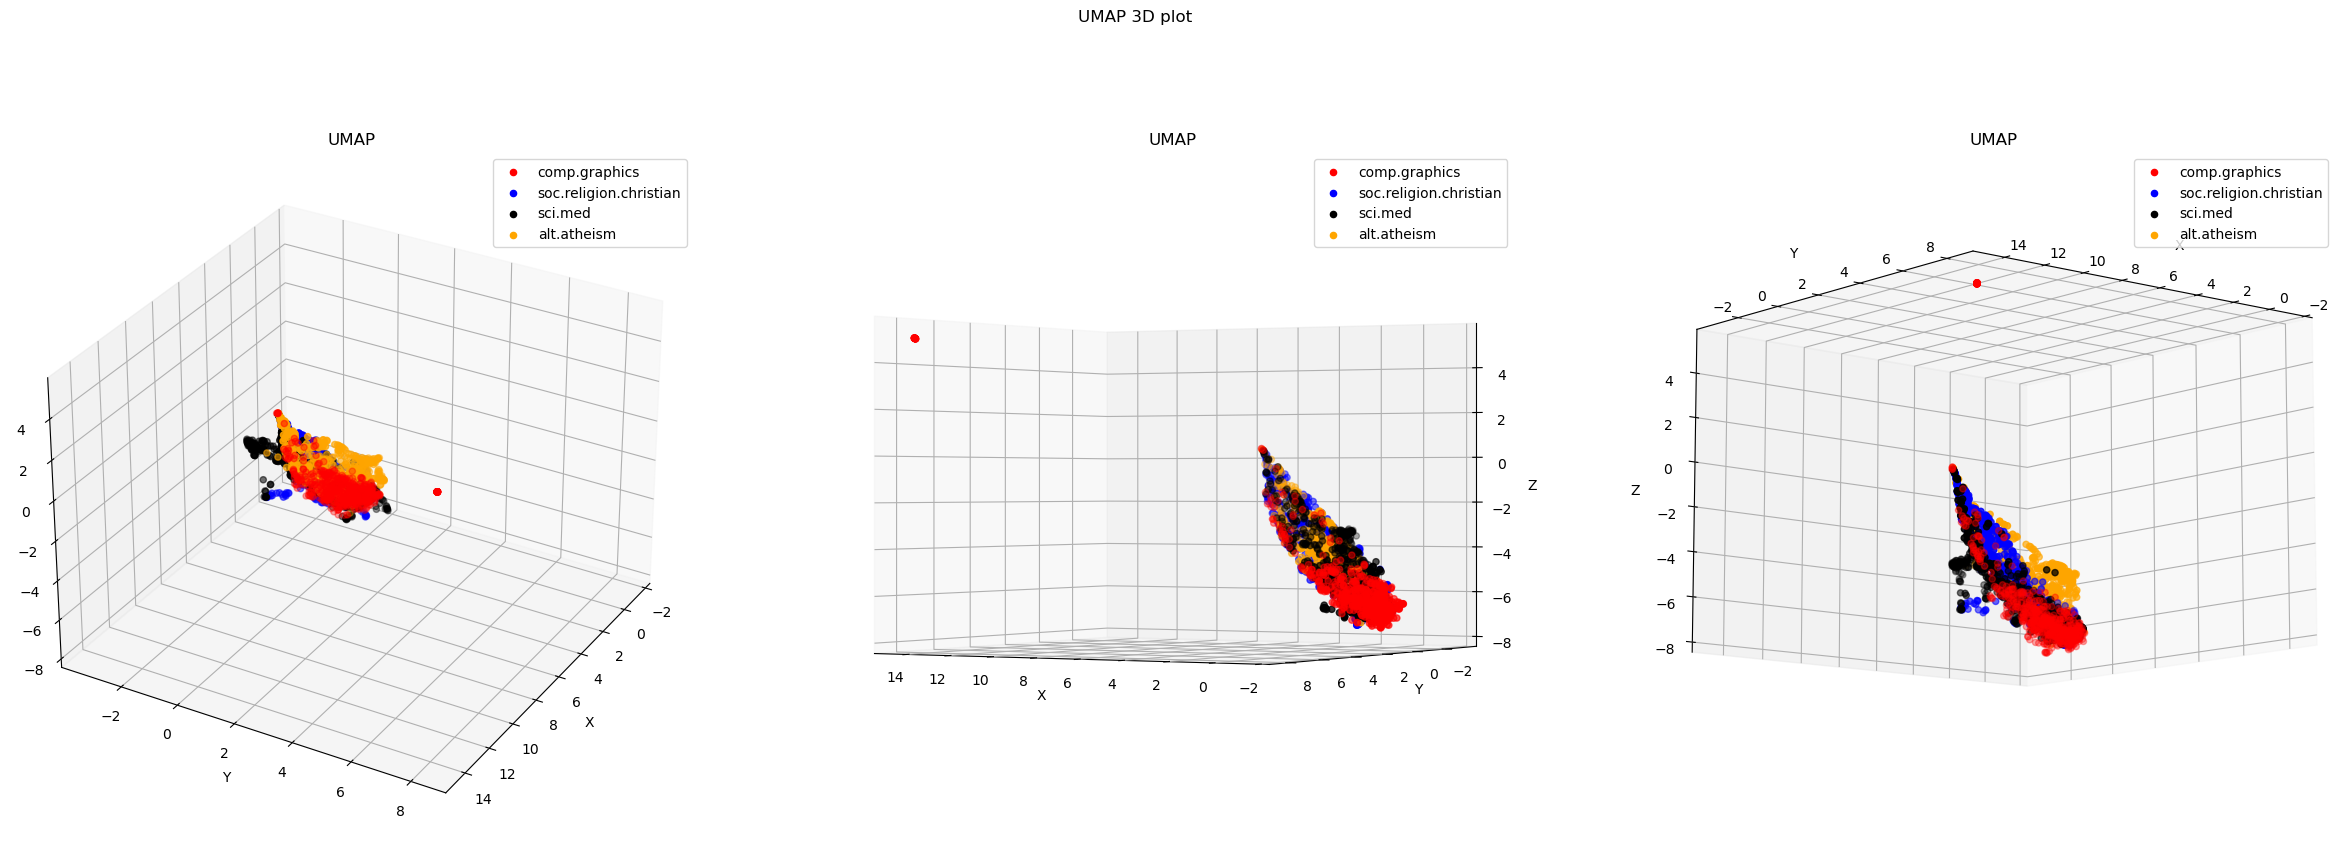

In [262]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('UMAP 3D plot')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_umap_aug, 'UMAP', elev=30, azim=30)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_umap_aug, 'UMAP', elev=0, azim=120)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP', elev=-10, azim=50)

plt.show()

In [224]:
'''
1. UMAP的分割看起來比PCA和t-SNE來得明顯
2. 從中間和右邊的角度看都有蠻明顯的分割點
'''

'\n1. UMAP的分割看起來比PCA和t-SNE來得明顯\n2. 從中間和右邊的角度看都有蠻明顯的分割點\n'

---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [269]:
# Answer here
'''
一樣可以產生one-hot encoding的結果
'''
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[::200]

,text,category,category_name,unigrams,tokenized_text,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","{like, convert, Nntp-Posting-Host:, anyone, Su...","[0, 1, 0, 0]"
200,From: johnsd2@rpi.edu (Dan Johnson) Subject: R...,3,soc.religion.christian,"[From, :, johnsd2, @, rpi.edu, (, Dan, Johnson...","{>States, faith., for, 5, pass,, Undoubtably.,...","[0, 0, 0, 1]"
400,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...,1,comp.graphics,"[From, :, nfotis, @, ntua.gr, (, Nick, C., Fot...","{domain, accepts, for, Denver,, 05446, 360-29-...","[0, 1, 0, 0]"
600,"From: ""Robert Knowles"" <p00261@psilink.com> Su...",0,alt.atheism,"[From, :, ``, Robert, Knowles, '', <, p00261, ...","{principles., 5, Nntp-Posting-Host:, word, use...","[1, 0, 0, 0]"
800,From: JJMARVIN@pucc.princeton.edu Subject: pra...,3,soc.religion.christian,"[From, :, JJMARVIN, @, pucc.princeton.edu, Sub...","{terms, for, marks, lose, relations, free, cut...","[0, 0, 0, 1]"
1000,From: bobs@thnext.mit.edu (Robert Singleton) S...,0,alt.atheism,"[From, :, bobs, @, thnext.mit.edu, (, Robert, ...","{faith., for, frame, word, existed., >position...","[1, 0, 0, 0]"
1200,From: eliezer@physics.llnl.gov (David A Elieze...,2,sci.med,"[From, :, eliezer, @, physics.llnl.gov, (, Dav...","{like, for, imaging?, 25, along,, find, Photon...","[0, 0, 1, 0]"
1400,From: r0506048@cml3 (Chun-Hung Lin) Subject: R...,1,comp.graphics,"[From, :, r0506048, @, cml3, (, Chun-Hung, Lin...","{width, JPG, ªL«T§», Nntp-Posting-Host:, descr...","[0, 1, 0, 0]"
1600,From: healta@saturn.wwc.edu (Tammy R Healy) Su...,0,alt.atheism,"[From, :, healta, @, saturn.wwc.edu, (, Tammy,...","{like, for, NEVER, free, get, world,, didn't, ...","[1, 0, 0, 0]"
1800,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism,"[From, :, sandvik, @, newton.apple.com, (, Ken...","{Jesus, lunatic, thinks, process, didn't, So, ...","[1, 0, 0, 0]"


---

# 2. New Dataset

In [310]:
import pandas as pd

df = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")